In [1]:
#Import Semua Packages/Library yang Digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Gathering Data
#Memuat tabel customers

import pandas as pd
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
#Gathering Data
#load tabel orders

orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
#Gathering Data
#Memuat tabel product

product_df = pd.read_csv("products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
#Gathering Data
#Load tabel seller

seler_df = pd.read_csv("sellers_dataset.csv")
seler_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [6]:
#insight
#Gathering Data adalah langkah awal yang krusial dalam Data Wrangling. Menggunakan metode yang tepat akan memastikan data yang dikumpulkan lebih bersih, relevan, dan siap untuk analisis
#Menampilkan tabel pada dataset E-commerce-public-dataset

In [7]:
#Assessing Data
#Menilai Data customers_df

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
#Assessing Data

customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [9]:
#Assessing Data
#menampilkan jumlah duplikasi pada customers

print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
#Assessing Data

customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [11]:
#Assessing Data
#Menilai Data orders_df

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
#Assessing Data
#menampilkan jumlah duplikasi pada orders

print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [13]:
#Assessing Data
#Menilai Data product_df

product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [14]:
#Assessing Data
#menampilkan jumlah duplikasi pada product

print("Jumlah duplikasi: ", product_df.duplicated().sum())
 
product_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [15]:
#Assessing Data
#menampilkan kolom product

print(product_df.isna().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [16]:
#Assessing Data
#Menilai Data seler_df

seler_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [17]:
#Assessing Data
#Menilai kolom Data seler_df

seler_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [18]:
#Assessing Data
#menampilkan jumlah duplikasi pada seler

print("Jumlah duplikasi: ", seler_df.duplicated().sum())
seler_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [19]:
#Cleaning Data

In [20]:
#Cleaning Data
#Membersihkan Data customers_df
#Menangani inaccurate value

customers_df[customers_df.customer_zip_code_prefix == customers_df.customer_zip_code_prefix.max()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
25752,f04c3f6e20a2a4318d97d7cec1d27bbf,8f846b30f8f56368cd1bf4c89efeed74,99990,muliterno,RS


In [21]:
#Cleaning Data

customers_df.loc[customers_df["customer_zip_code_prefix"] > 99999, "customer_zip_code_prefix"].median()

nan

In [22]:
#Cleaning Data
#Membersihkan Data orders_df
#Menangani tipe data

datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [23]:
#Cleaning Data
#menampilkan data orders untuk menangani missing value pada data orders_df

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [24]:
#Cleaning Data
#Membersihkan Data orders_df
#Menangani missing value

orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
#Cleaning Data

orders_df.dropna(subset=["order_approved_at", "order_delivered_carrier_date"], inplace=True)

In [26]:
#Cleaning Data
#menampilkan hasil Membersihkan Data orders_df

orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1183
order_estimated_delivery_date       0
dtype: int64

In [27]:
#Cleaning Data
#Membersihkan Data orders_df
#Menangani inacurrate value

orders_df[orders_df["order_delivered_customer_date"] < orders_df["order_purchase_timestamp"]]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [28]:
#Cleaning Data
#Melanjutkan membersihkan Data orders_df
#Menangani inacurrate value

orders_df[orders_df["order_approved_at"] < orders_df["order_purchase_timestamp"]]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [29]:
#Cleaning Data

product_df[product_df.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Cleaning Data

product_df.value_counts()

product_id                        product_category_name  product_name_lenght  product_description_lenght  product_photos_qty  product_weight_g  product_length_cm  product_height_cm  product_width_cm
fffe9eeff12fcbd74a2f2b007dde0c58  brinquedos             57.0                 1536.0                      3.0                 3900.0            43.0               16.0               11.0                1
00066f42aeeb9f3007548bb9d3f33c38  perfumaria             53.0                 596.0                       6.0                 300.0             20.0               16.0               16.0                1
00088930e925c41fd95ebfe695fd2655  automotivo             56.0                 752.0                       4.0                 1225.0            55.0               10.0               26.0                1
0009406fd7479715e4bef61dd91f2462  cama_mesa_banho        50.0                 266.0                       2.0                 300.0             45.0               15.0               35.0   

In [32]:
#Cleaning Data

product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [33]:
#Cleaning Data
#Membersihkan Data seler_df
#Menangani inacurrate value

seler_df[seler_df["seller_zip_code_prefix"] > 99999]

,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [34]:
#Cleaning Data

seler_df.loc[seler_df["seller_zip_code_prefix"] > 99999, "seller_zip_code_prefix"] = seler_df["seller_zip_code_prefix"].median()

In [35]:
#Cleaning Data

seler_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [36]:
#insight
#Cleaning Data sangat penting untuk memastikan kualitas data sebelum analisis

In [37]:
#Exploratory Data Analysis (EDA)

In [38]:
#Exploratory Data Analysis (EDA)
#melihat rangkuman parameter statistik dari data customers_df

customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [39]:
#Exploratory Data Analysis (EDA)
#demografi pelanggan berdasarkan jenis customer_zip_code_prefix

customers_df.groupby(by="customer_zip_code_prefix").agg({
    "customer_id": "nunique",
    "customer_zip_code_prefix": ["max", "min", "mean", "std"]
    })

customer_id customer_zip_code_prefix                  \
                             nunique                      max    min     mean   
customer_zip_code_prefix                                                        
1003                               1                     1003   1003   1003.0   
1004                               2                     1004   1004   1004.0   
1005                               6                     1005   1005   1005.0   
1006                               2                     1006   1006   1006.0   
1007                               4                     1007   1007   1007.0   
...                              ...                      ...    ...      ...   
99960                              2                    99960  99960  99960.0   
99965                              2                    99965  99965  99965.0   
99970                              1                    99970  99970  99970.0   
99980                              2                    99980  99980  99980.0   
99990                              1                    99990  99990  99990.0   

                               
                          std  
customer_zip_code_prefix       
1003                      NaN  
1004                      0.0  
1005                      0.0  
1006                      0.0  
1007                      0.0  
...                       ...  
99960                     0.0  
99965                     0.0  
99970                     NaN  
99980                     0.0  
99990                     NaN  

[14994 rows x 5 columns]

In [40]:
#Exploratory Data Analysis (EDA)
#melihat persebaran jumlah pelanggan berdasarkan kota (city)

customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ponto novo                1
populina                  1
porteiras                 1
portela                   1
pitanga de estrada        1
Name: customer_id, Length: 4119, dtype: int64

In [41]:
#Exploratory Data Analysis (EDA)
#melihat persebaran jumlah pelanggan berdasarkan negara bagian (state)

customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [42]:
#Exploratory Data Analysis (EDA)
#Eksplorasi Data orders_df
#menampilkan rangkuman parameter statistik dari data orders_df

orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [43]:
#Exploratory Data Analysis (EDA)
#menampilkan Data orders_df

orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [53]:
#Visualization & Explanatory Analysis
#ada berapa jumlah masing masing status pemesanan?

orders_df = pd.read_csv("orders_dataset.csv")

jumlah_status = orders_df['order_status'].value_counts()
top3_status = jumlah_status.nlargest(3)

print(top3_status)

order_status
delivered    96478
shipped       1107
canceled       625
Name: count, dtype: int64


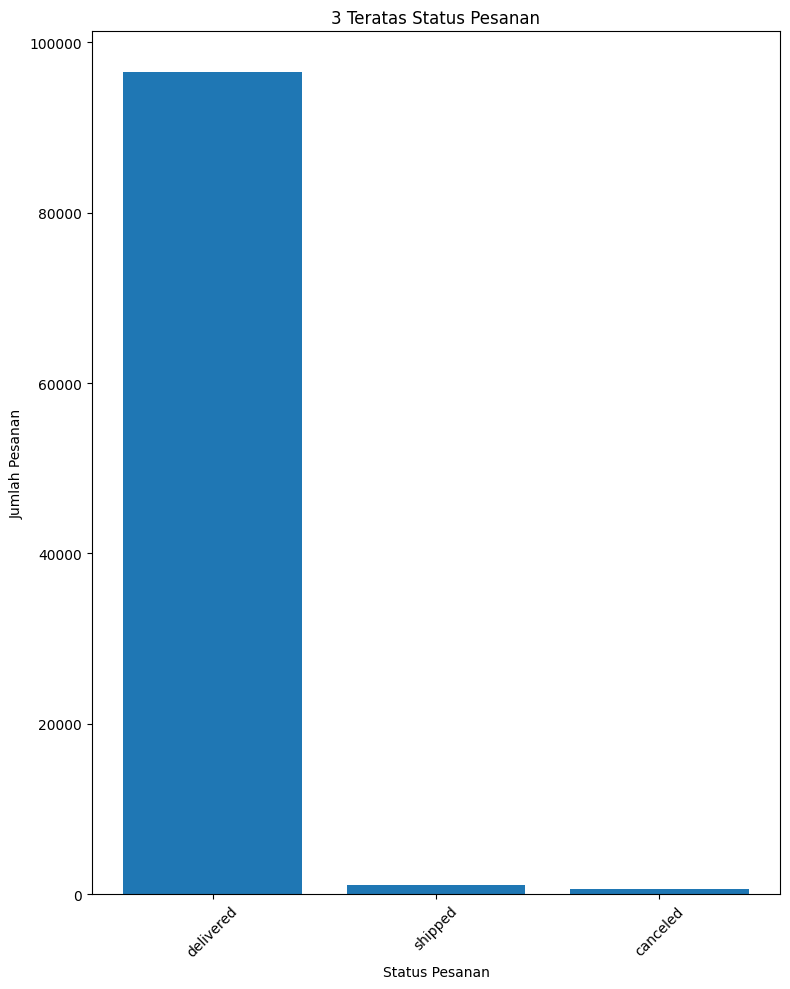

In [54]:
#Visualization & Explanatory Analysis
#menghasilkan visualisasi data status pesanan dengan diagram batang

status = top3_status.index
jumlah = top3_status.values

plt.figure(figsize=(8, 10))
plt.bar(status, jumlah)
plt.title('3 Teratas Status Pesanan')
plt.xlabel('Status Pesanan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
#Visualization & Explanatory Analysis
#ada berapa jumlah masing masing status pembayaran?

payments_df = pd.read_csv("order_payments_dataset.csv")
jumlah_payments = payments_df['payment_type'].value_counts()
top3_payments = jumlah_payments.nlargest(3)

print(top3_payments)

payment_type
credit_card    76795
boleto         19784
voucher         5775
Name: count, dtype: int64


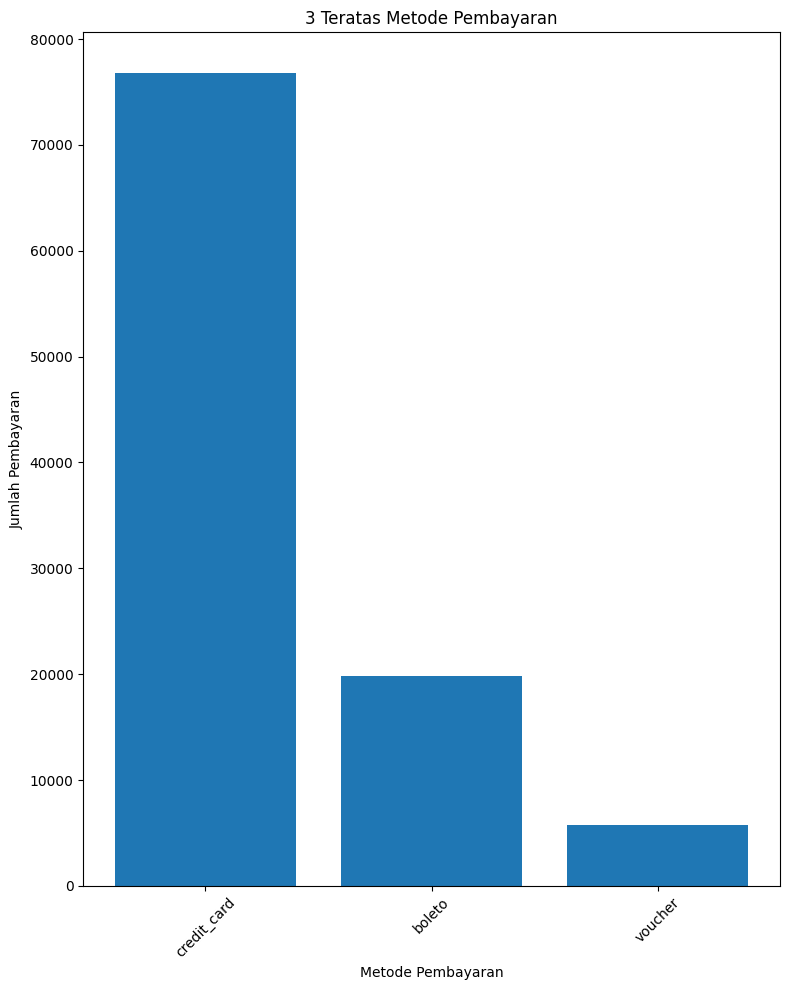

In [52]:
#Visualization & Explanatory Analysis
#menghasilkan visualisasi data status pembayaran dengan diagram batang

payment = top3_payments.index
jumlah = top3_payments.values

plt.figure(figsize=(8, 10))
plt.bar(payment, jumlah)
plt.title('3 Teratas Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Pembayaran')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#insight
#Visualization & Explanatory Analysis membantu dalam memahami data dengan lebih baik
#Menyajikan data dalam bentuk diagram batang

In [47]:
#eksplorasi all data
# 1. Membaca File CSV
orders_df = pd.read_csv("orders_dataset.csv")
payments_df = pd.read_csv("order_payments_dataset.csv")
customers_df = pd.read_csv("customers_dataset.csv")

# 2. Menggabungkan DataFrame
order_payments_df = pd.merge(orders_df, payments_df, on="order_id", how="left")
all_data = pd.merge(order_payments_df, customers_df, on="customer_id", how="right")

print(all_data.head())

                           order_id                       customer_id  \
0  00e7ee1b050b8499577073aeb2a297a1  06b8999e2fba1a1fbc88172c00ba8bc7   
1  29150127e6685892b6eab3eec79f59c7  18955e83d337fd6b2def6b18a428ac77   
2  b2059ed67ce144a36e2aa97d2c9e9ad2  4e7b3e00288586ebd08712fdd0374a03   
3  951670f92359f4fe4a63112aa7306eba  b2b6027bc5c5109e529d4dc6358b12c3   
4  6b7d50bd145f6fc7f33cebabd7e49d0f  4f2d8ab171c80ec8364f7c12e35b23ad   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-05-16 15:05:35  2017-05-16 15:22:12   
1    delivered      2018-01-12 20:48:24  2018-01-12 20:58:32   
2    delivered      2018-05-19 16:07:45  2018-05-20 16:19:10   
3    delivered      2018-03-13 16:06:38  2018-03-13 17:29:19   
4    delivered      2018-07-29 09:51:30  2018-07-29 10:10:09   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-05-23 10:47:57           2017-05-25 10:35:35   
1          2018-01-15 17:14:59           2018-01